In [1]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, ttest_1samp

In [2]:
# Load the dataset
df = pd.read_csv("Data/winequality-red.csv")

In [7]:
# Select the variable to demonstrate the CLT
variable = 'pH'

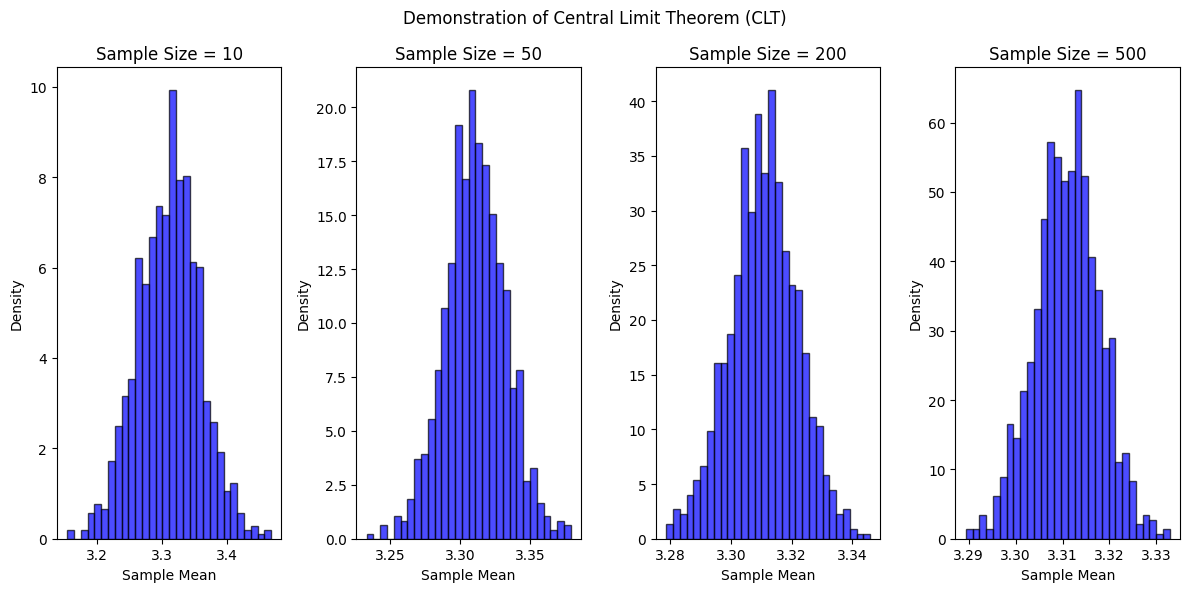


Summary of CLT Demonstration:
   Sample Size  Sample Mean (Approx)  Expected Standard Error
0           10              3.309958                 0.048821
1           50              3.310838                 0.021834
2          200              3.310679                 0.010917
3          500              3.311013                 0.006904

Population Mean:
3.3111131957473416

Population Std:
0.15438646490354277


In [ ]:
population = df[variable].dropna().values  # Remove NaN values if any

# Define sample sizes
sample_sizes = [10, 50, 200, 500]
num_samples = 1000  # Number of resamples per sample size

# Dictionary to store sample means
sample_means = {size: [] for size in sample_sizes}

# Generate sample means for each sample size
for size in sample_sizes:
    for _ in range(num_samples):
        sample = np.random.choice(population, size=size, replace=True)  # Bootstrap resampling
        sample_means[size].append(np.mean(sample))

# Plot histograms of sample means for different sample sizes
plt.figure(figsize=(12, 6))

for i, size in enumerate(sample_sizes):
    plt.subplot(1, len(sample_sizes), i + 1)
    plt.hist(sample_means[size], bins=30, alpha=0.7, color="blue", edgecolor="black", density=True)
    plt.title(f"Sample Size = {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")

plt.suptitle("Demonstration of Central Limit Theorem (CLT)")
plt.tight_layout()
plt.show()

# Compute the population mean and standard deviation
pop_mean = np.mean(population)
pop_std = np.std(population, ddof=1)  # Using sample std deviation formula

# Compute theoretical standard deviations of sample means (Standard Error)
std_errors = {size: pop_std / np.sqrt(size) for size in sample_sizes}

# Display summary of results
clt_summary = pd.DataFrame({
    "Sample Size": sample_sizes,
    "Sample Mean (Approx)": [np.mean(sample_means[size]) for size in sample_sizes],
    "Sample Std": [np.std(sample_means[size]) for size in sample_sizes],
    "Expected Standard Error": [std_errors[size] for size in sample_sizes]
})

# Print the summary table
print("\nSummary of CLT Demonstration:")
print(clt_summary)

# Print the population mean
print("\nPopulation Mean:")
print(pop_mean)

# Print the population mean
print("\nPopulation Std:")
print(pop_std)